<img src=https://www.hstoday.us/wp-content/uploads/2018/11/earthquake-3167693_1920.jpg> 

<img src="https://cdn-images-1.medium.com/max/2000/1*MEcMeVoX9Mdqtk83oLBuEQ.png" width=200>

In [1]:
# Run this cell to install vaex
!pip install vaex --quiet

     |████████████████████████████████| 4.6 MB 10.8 MB/s 
     |████████████████████████████████| 43 kB 762 kB/s 
     |████████████████████████████████| 58 kB 3.7 MB/s 
     |████████████████████████████████| 237 kB 9.5 MB/s 
     |████████████████████████████████| 1.1 MB 32.3 MB/s 
     |████████████████████████████████| 99 kB 4.7 MB/s 
     |████████████████████████████████| 1.2 MB 28.3 MB/s 
     |████████████████████████████████| 3.7 MB 44.6 MB/s 
     |████████████████████████████████| 2.9 MB 37.2 MB/s 
     |████████████████████████████████| 11.7 MB 44.4 MB/s 
     |████████████████████████████████| 510 kB 48.1 MB/s 
     |████████████████████████████████| 260 kB 60.0 MB/s 
     |████████████████████████████████| 3.3 MB 36.1 MB/s 
     |████████████████████████████████| 2.7 MB 28.7 MB/s 
     |████████████████████████████████| 1.6 MB 29.4 MB/s 
     |████████████████████████████████| 271 kB 56.4 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████

#**Q1**: Load a large CSV file into a pandas dataframe and a vaex dataframes (2 pts)
1. load the csv file into a pandas dataframe
2. convert it to hdf5 format
3. load the hdf5 file in a vaex dataframe 

The csv file is given to you in the code cell below. Check out this [Vaex page](https://vaex.readthedocs.io/en/latest/faq.html#I-have-a-massive-CSV-file-which-I-can-not-fit-all-into-memory-at-one-time.-How-do-I-convert-it-to-HDF5?) to see how you can convert a csv file to hdf5 format.

The data are from Los Alamos National Laboratory for predicting earthquake. Here are the info of the data:

* `acoustic_data` - the seismic signal 
* `time_to_failure` - the time (in seconds) until the next laboratory earthquake 




In [2]:
import vaex
import pandas as pd
import warnings; warnings.filterwarnings("ignore")

csvFile = 'http://furryhelpers.com/SJSU/CS133/train_50m.csv'

# Loads the csv file in a pandas dataframe.
pandas_df = pd.read_csv(csvFile)
pandas_df

,acoustic_data,time_to_failure
0,12,1.469100
1,6,1.469100
2,8,1.469100
3,5,1.469100
4,8,1.469100
...,...,...
50145475,7,14.165698
50145476,1,14.165698
50145477,3,14.165698
50145478,1,14.165698


In [3]:
# Converts the pandas dataframe to hdf5 format and loads the hdf5 file in a vaex dataframe.
vaex_df = vaex.from_pandas(pandas_df, copy_index=False)
vaex_df.export_hdf5('data.hdf5')
hdf5_df = vaex.open('data.hdf5')
hdf5_df

#,acoustic_data,time_to_failure
0,12,1.4690999832
1,6,1.4690999821
2,8,1.469099981
3,5,1.4690999799
4,8,1.4690999788
...,...,...
"50,145,475",7,14.165697511
"50,145,476",1,14.16569751
"50,145,477",3,14.165697509
"50,145,478",1,14.165697508


#**Q2.** Compare the time performance between pandas and vaex. (2 pts)
The average `time_to_failure` is `4.513`. Calculate and store the remeaned values (`time_to_failure - 4.513`) in a new column, `remean_ttf`, in both the vaex dataframe and the pandas dataframe. Display the updated dataframes.

Use the `%%time` to compare the time effiency of using the pandas dataframe vs. the vaex dataframe to do such operation.


In [4]:
# Calculates and stores the remeaned values in a new column in the pandas dataframe.

%%time
pandas_df["remean_ttf"] = pandas_df["time_to_failure"] - 4.513
pandas_df

CPU times: user 271 ms, sys: 0 ns, total: 271 ms
Wall time: 236 ms


,acoustic_data,time_to_failure,remean_ttf
0,12,1.469100,-3.043900
1,6,1.469100,-3.043900
2,8,1.469100,-3.043900
3,5,1.469100,-3.043900
4,8,1.469100,-3.043900
...,...,...,...
50145475,7,14.165698,9.652698
50145476,1,14.165698,9.652698
50145477,3,14.165698,9.652698
50145478,1,14.165698,9.652698


In [5]:
# Calculates and stores the remeaned values in a new column in the vaex dataframe.

%%time
hdf5_df["remean_ttf"] = hdf5_df["time_to_failure"] - 4.513
hdf5_df

CPU times: user 218 µs, sys: 86 µs, total: 304 µs
Wall time: 314 µs


#,acoustic_data,time_to_failure,remean_ttf
0,12,1.4690999832,-3.0439000168
1,6,1.4690999821,-3.0439000179
2,8,1.469099981,-3.0439000189999996
3,5,1.4690999799,-3.0439000200999997
4,8,1.4690999788,-3.0439000212
...,...,...,...
"50,145,475",7,14.165697511,9.652697511
"50,145,476",1,14.16569751,9.65269751
"50,145,477",3,14.165697509,9.652697509
"50,145,478",1,14.165697508,9.652697508


###**Q2.1** Which dataframe has better time performance?

The vaex dataframe has better time performance.


#**Q3** Use the vaex data frame to calculate the average `time_to_failure` group by `acoustic_data`. (2 pts)
- Store the resulting dataframe in a variable of your choice.


In [6]:
# Calculates the average time to failure grouped by acoustic data.
hdf5_df_group = hdf5_df.groupby(hdf5_df.acoustic_data, agg=vaex.agg.mean(hdf5_df.time_to_failure))
hdf5_df_group

#,acoustic_data,time_to_failure_mean
0,12,4.43112836110124
1,0,5.131622649969538
2,28,3.8434325455779432
3,20,3.9267502428456456
4,-46,3.6864479661611957
...,...,...
"3,038",797,0.31559588808
"3,039",742,0.31559561087
"3,040",859,0.31559550747
"3,041",-517,0.31459985578


#**Q4** Visualize the data with a line plot. (4 pts)
- Using the dataframe created in Q3, convert it back to a pandas dataframe 
- Create a seaborn `lineplot` that shows the `acoustic_data` and the `time_to_failure_mean` data on two y-axises on the same plot. Add a legend to the plot.
- Add a meaningful title to the plot.

Here is an example of the expected plot:

<img src="https://drive.google.com/uc?export=view&id=1mqprsln4Lw7w5V2xiqizhDPMMZKSw2qF" width=800px>

Check out [this blog](https://towardsdatascience.com/adding-a-third-y-axis-to-python-combo-chart-39f60fb66708) to learn more on how to plot on both y-axises.

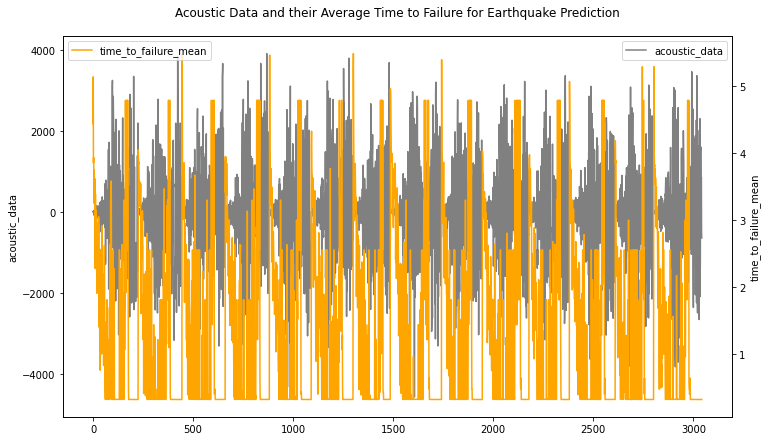

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Converts the vaex dataframe from Q3 to a pandas dataframe.
pandas_df_group = hdf5_df_group.to_pandas_df()

# Creates a lineplot showing the acoustic data and time to failure mean on 2 y-axes on the same plot.

plt.figure(figsize=(12,7))

# Creates a lineplot on the first y-axis.
ax1 = sns.lineplot(
    data=pandas_df_group,
    x=pandas_df_group.index,
    y='acoustic_data',
    sort=False,
    color='gray'
)
ax1.legend(['acoustic_data'], loc='upper right')

# Adds the second y-axis to the lineplot.
ax2 = ax1.twinx()
sns.lineplot(
    data=pandas_df_group,
    x=pandas_df_group.index,
    y='time_to_failure_mean',
    sort=False,
    color='orange',
    ax=ax2
)
ax2.grid(False)
ax2.legend(['time_to_failure_mean'], loc='upper left')

plt.title("Acoustic Data and their Average Time to Failure for Earthquake Prediction", pad=20)
plt.show()